- Use alpaca dataset  
- CNN must include : Convolution layer, Pooling layer, Flatten layer,Dense layer Plot: 
- Accuracy vs Epochs 
- Loss (Error) vs Epochs 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

2026-01-06 12:23:41.172195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 12:23:41.179381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767682421.187776  206804 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767682421.190384  206804 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767682421.197014  206804 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
train_dataset = image_dataset_from_directory(
    'Data/alpaca_dataset',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

classes = train_dataset.class_names
print("Classes:", classes)

Found 327 files belonging to 2 classes.


I0000 00:00:1767682422.589972  206804 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Classes: ['alpaca', 'not alpaca']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten   
from tensorflow.keras.optimizers import Adam

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_dataset, epochs=10)

Epoch 1/10


I0000 00:00:1767682423.843951  207006 service.cc:152] XLA service 0x71df94004d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767682423.843972  207006 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 12:23:43.861862: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767682423.938833  207006 cuda_dnn.cc:529] Loaded cuDNN version 91701
2026-01-06 12:23:44.296093: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 4 bytes spill stores, 4 bytes spill loads



 5/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5316 - loss: 2149.7764

I0000 00:00:1767682426.530325  207006 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.5224 - loss: 1635.4093
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5299 - loss: 45.5631
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7813 - loss: 1.1301
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9137 - loss: 0.2633
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9923 - loss: 0.1484
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9896 - loss: 0.1012
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0403
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9958 - loss: 0.0160
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0015


In [8]:
losses = history.history['loss']
accuracies = history.history['accuracy']

In [9]:
x = np.arange(1, len(losses) + 1)

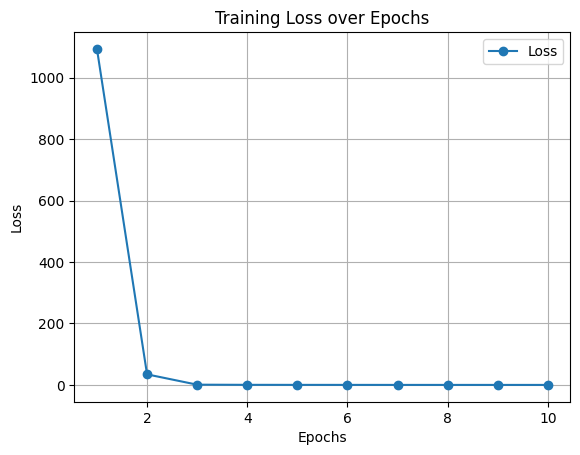

In [13]:
import matplotlib.pyplot as plt
plt.plot(x, losses, label='Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

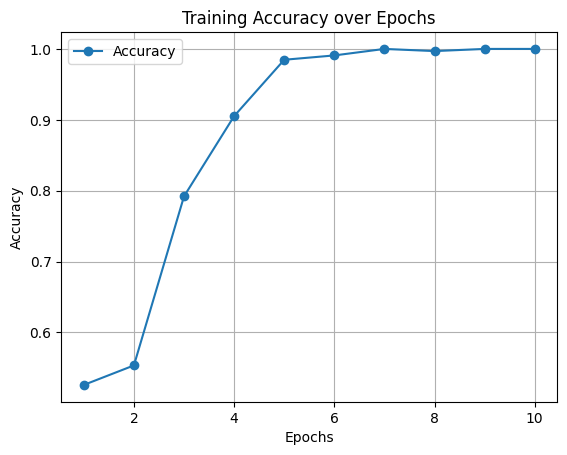

In [14]:
plt.plot(x, accuracies, label='Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()